# Predict Assessed Property Value for The Purpose of Property Tax Assessment

# Task 1

# Importing Libraries

In [1]:
#We are import the necessary libraries required 
import pandas as pd # pandas is used for data manipulation on dataframe
import numpy as np #numpy is  used for mathematical operation on array
import seaborn as sns # seaborn is used for data visualization
import matplotlib.pyplot as plt # matplotlib is used for data visualizationV


# Task 2

# Loading the Dataset

In [2]:
df=pd.read_csv(r"C:\Users\Alisha DJ\Downloads\Traindata.csv") # loading the data 

# Task 3

# EXPLORATORY DATA ANALYSIS

In [66]:
df.head() # checking the first 5 rows of the data

,PropertyID,Borough,State,Surroundings,Address,ZipCode,Block,Lot,BldgClassCategory,NoOfResidentialUnits,NoOfCommercialUnits,TotalNoOfUnits,LandAreaInSqFt,GrossAreaInSqFt,YearOfConstruction,TaxClass_AtEvaluationTime,BldgClass_AtEvaluationTime,DateOfEvaluation,PropertyEvaluationvalue
0,PR11101,1,NY,BATHGATE,1473 CROTONA PLACE,10456,2927,127,02 TWO FAMILY DWELLINGS,2,0,2,1900,2394,1990,1,B1,30-05-2014,540000
1,PR11102,1,NY,BATHGATE,453 EAST 181,10457,3037,110,03 THREE FAMILY DWELLINGS,3,0,3,1687,3037,2002,1,C0,13-09-2014,750000
2,PR11103,1,NY,BATHGATE,511 EAST 171 STREET,10457,2912,155,02 TWO FAMILY DWELLINGS,2,0,2,2000,2400,1989,1,B1,28-09-2014,470000
3,PR11104,1,NY,BATHGATE,547 CLAREMONT PARKWAY,10457,2929,134,02 TWO FAMILY DWELLINGS,2,0,2,2356,2394,1991,1,B1,05-06-2014,570000
4,PR11105,1,NY,BATHGATE,2063 WASHINGTON AVENUE,10457,3036,140,02 TWO FAMILY DWELLINGS,2,0,2,3346,2308,1993,1,B1,07-02-2015,640000


In [28]:
df.tail() # checking the last 5 rows of data 

,Borough,ZipCode,Block,Lot,NoOfResidentialUnits,NoOfCommercialUnits,TotalNoOfUnits,LandAreaInSqFt,GrossAreaInSqFt,YearOfConstruction,...,DateOfEvaluation_31-05-2013,DateOfEvaluation_31-05-2014,DateOfEvaluation_31-07-2013,DateOfEvaluation_31-07-2014,DateOfEvaluation_31-08-2012,DateOfEvaluation_31-08-2014,DateOfEvaluation_31-10-2012,DateOfEvaluation_31-10-2014,DateOfEvaluation_31-12-2012,DateOfEvaluation_31-12-2014
16805,4,10007,123,1213,1,0,1,29715,2803,2004,...,0,0,0,0,0,0,0,0,0,0
16806,4,10013,176,1054,1,0,1,12518,2252,2003,...,0,0,0,0,0,0,0,0,0,0
16807,4,10013,176,1102,1,0,1,12518,2177,2003,...,0,0,0,0,0,0,0,0,0,0
16808,4,10280,16,2249,1,0,1,12644,594,1981,...,0,0,0,0,0,0,0,0,0,0
16809,4,10031,2065,22,16,1,17,4996,29529,2007,...,0,0,0,0,0,0,0,0,0,0


In [12]:
df.shape #checking the shape of the data

(16810, 19)

In [14]:
df.describe() #Describing the dataset for ease of understanding

,Borough,ZipCode,Block,Lot,NoOfResidentialUnits,NoOfCommercialUnits,TotalNoOfUnits,LandAreaInSqFt,GrossAreaInSqFt,YearOfConstruction,TaxClass_AtEvaluationTime,PropertyEvaluationvalue
count,16810.000000,16810.000000,16810.000000,16810.000000,16810.000000,16810.000000,16810.000000,1.681000e+04,1.681000e+04,16810.000000,16810.000000,1.681000e+04
mean,3.439143,10871.027543,5428.122308,266.327722,1.862225,0.137775,2.000000,1.092492e+04,3.612157e+03,1973.982867,1.289530,8.084101e+05
std,1.398950,522.996869,3710.031921,542.420132,8.027805,2.185857,8.472771,5.837620e+04,1.627378e+04,23.632595,0.713779,8.978317e+05
min,1.000000,10001.000000,6.000000,1.000000,0.000000,0.000000,1.000000,1.000000e+00,1.000000e+00,1941.000000,1.000000,1.000440e+05
25%,2.000000,10312.000000,2401.250000,25.000000,1.000000,0.000000,1.000000,2.100000e+03,1.224000e+03,1951.000000,1.000000,4.250000e+05
50%,3.000000,11207.000000,5050.000000,52.000000,1.000000,0.000000,1.000000,3.200000e+03,1.750000e+03,1968.000000,1.000000,5.900000e+05
75%,5.000000,11364.000000,7376.750000,138.000000,2.000000,0.000000,2.000000,5.000000e+03,2.449750e+03,1998.000000,1.000000,8.450000e+05
max,5.000000,11694.000000,16314.000000,5323.000000,437.000000,252.000000,437.000000,5.612000e+06,1.172005e+06,2012.000000,4.000000,9.935000e+06


In [14]:
df.dtypes #checking the datatypes of each feature

PropertyID                    object
Borough                        int64
State                         object
Surroundings                  object
Address                       object
ZipCode                        int64
Block                          int64
Lot                            int64
BldgClassCategory             object
NoOfResidentialUnits           int64
NoOfCommercialUnits            int64
TotalNoOfUnits                 int64
LandAreaInSqFt                 int64
GrossAreaInSqFt                int64
YearOfConstruction             int64
TaxClass_AtEvaluationTime      int64
BldgClass_AtEvaluationTime    object
DateOfEvaluation              object
PropertyEvaluationvalue        int64
dtype: object

In [16]:
df.shape[0] #finding the number of rows


16810

In [16]:
df.shape[1] #finding the number of columns

19

# VISUALIZATION

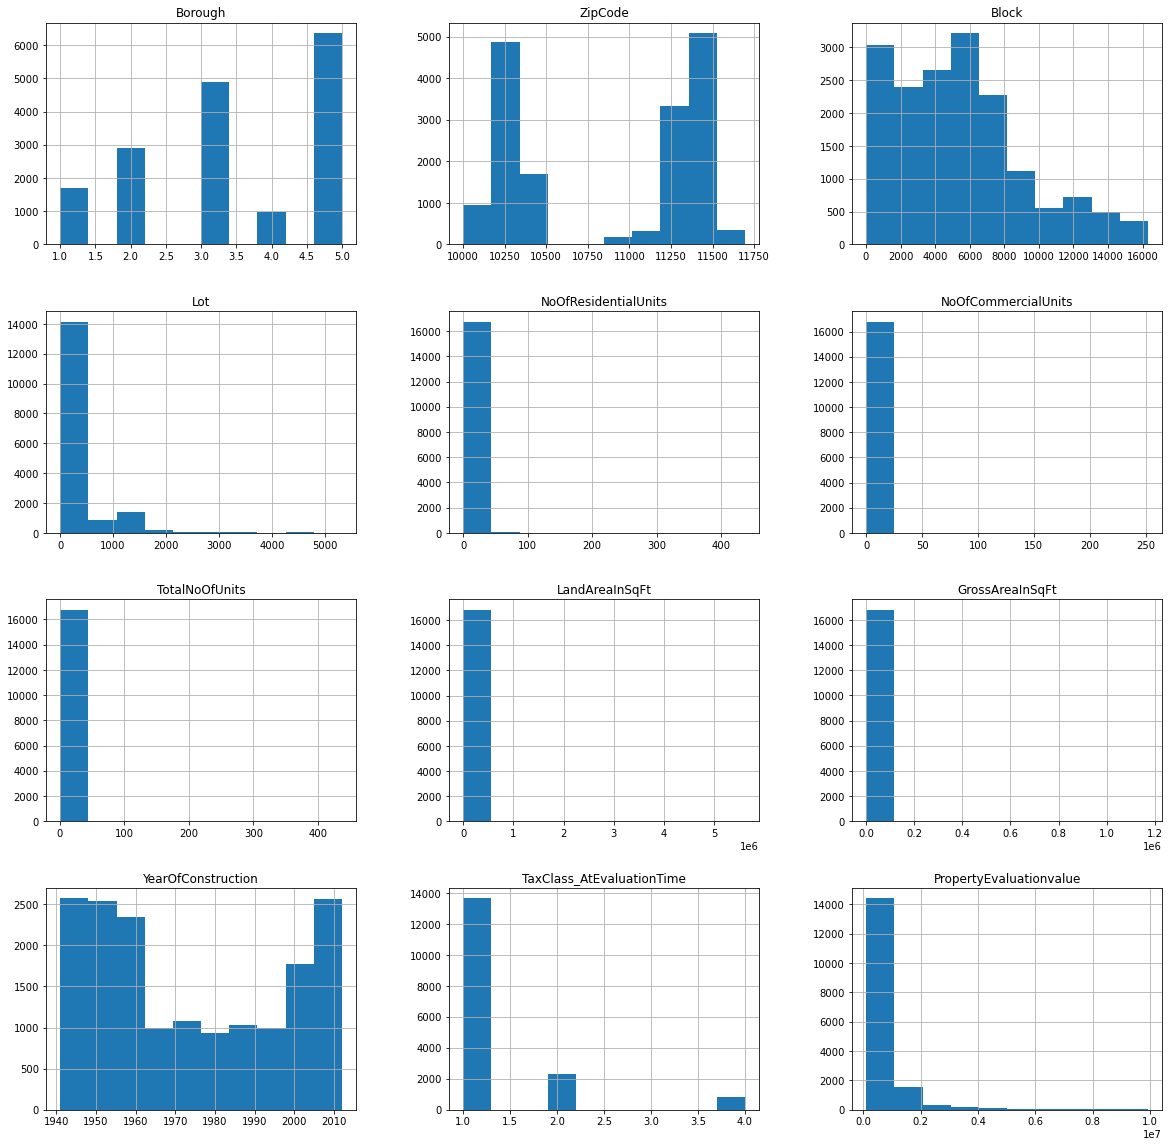

In [8]:
# To understand how various features are distributed
df.hist(figsize=(20,20))
plt.show()

In [17]:
#To find correlation between features
corr = df.corr()

In [5]:
corr.shape

(12, 12)

<AxesSubplot:>

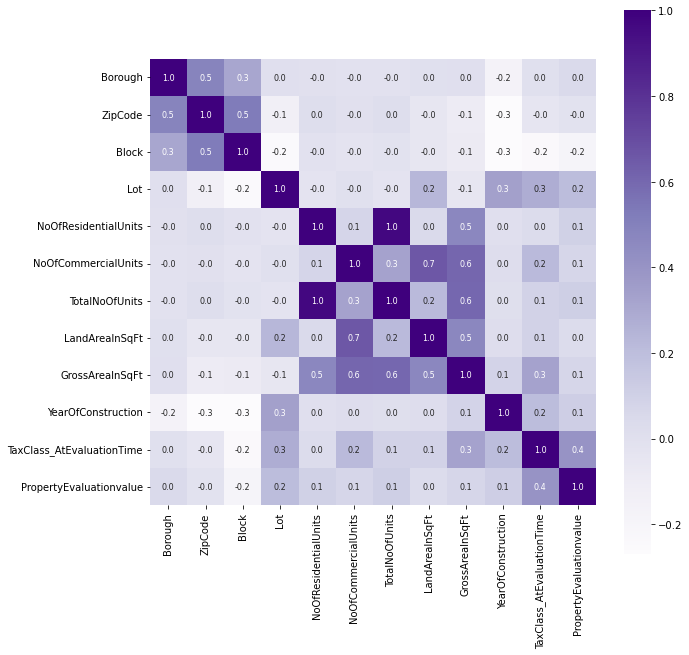

In [7]:
#Plotting the heatmap of correlation between features
# constructing a heatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Purples')

# TASK 4


Splitting the data and Target

In [10]:
from sklearn.model_selection import train_test_split #importing the library

In [11]:
#Splitting target variable and independent variables
X = df.drop(['PropertyEvaluationvalue'], axis = 1)
y = df['PropertyEvaluationvalue'] 

In [12]:
#Splitting to traing and testing data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=2)

In [13]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(13448, 18)
(3362, 18)
(13448,)
(3362,)


# Task 5

# Using The Random Forest Regressor

# 5.1 First Train the Model

In [69]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [67]:
#Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

In [47]:
#Create a Random Forest Regressor
reg = RandomForestRegressor()

RandomForestRegressor()

In [68]:
#Train the model using the training sets
reg.fit(X_train, y_train)

RandomForestRegressor()

# 5.2 Now perform Model Evaluation

In [55]:
#ModelPrediction on Train Data
y_pred = reg.predict(X_train)


In [56]:
#Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))

R^2: 0.9589622581126392


Visualizing the PropertyEvaluationvalue and Predicted PropertyEvaluationvalue

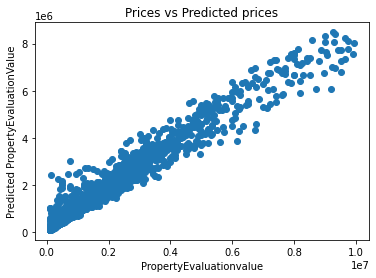

In [57]:
plt.scatter(y_train, y_pred)
plt.xlabel("PropertyEvaluationvalue")
plt.ylabel("Predicted PropertyEvaluationValue")
plt.title("Prices vs Predicted prices")
plt.show()

# 5.3 Prediction on Test Data

In [59]:
#Predicting Test data with the model
y_test_pred = reg.predict(X_test)

In [60]:
#Model Evaluation
acc_rf = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_rf)

R^2: 0.6871949683378946


In [7]:
df.to_csv('data.csv')